# Data Workflow Lab 1

Clean and summarize Project 3 data.

### Learning Objectives

* Practice text cleaning techniques
* Practice datatype conversion
* Practice filling in missing values with either 0 or the average in the column
* Practice categorical data techniques
* Transform data into usable quantities


In [4]:
% matplotlib inline
import datetime
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
pwd

u'/Users/Stav/github-repos/Stav-Grossfeld-DSI/week-03/3.3-lab/code/starter-code'

In [6]:
# Load the data
#df = pd.read_csv("/Users/Stav/Desktop/Iowa_Liquor_Sales_reduced.csv")
df = pd.read_csv('/Users/Stav/Desktop/Iowa_Liquor_sales_sample_10pct.csv')
print df.columns
df.head()

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


## Clean the data

Let's practice our data cleaning skills on the Project 3 dataset. If you don't remember how to do any of these tasks, look back at your work from the previous weeks or search the internet. There are many blog articles and Stack Overflow posts that cover these topics.

You'll want to complete at least the following tasks:
* Remove redundant columns
* Remove "$" prices from characters and convert values to floats.
* Convert dates to pandas datetime objects
* Convert category floats to integers
* Drop or fill in bad values

In [7]:
df.columns.values


array(['Date', 'Store Number', 'City', 'Zip Code', 'County Number',
       'County', 'Category', 'Category Name', 'Vendor Number',
       'Item Number', 'Item Description', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'], dtype=object)

In [8]:
# Remove $ from certain columns
for name in df.columns.values:   #iterate through columns
   # print df[name][0]
    if '$' in str(df[name][0]):  
        df[name] = df[name].apply(lambda x: x.split('$')[1]).apply(lambda x: float(x)) 
    else: continue
df[0:10]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null float64
State Bottle Retail      270955 non-null float64
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null float64
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(7), int

In [9]:
# Convert dates
df['Date'] = pd.to_datetime(df['Date'])  #convert date to datetime dtype
df['Date'].head()


0   2015-11-04
1   2016-03-02
2   2016-02-11
3   2016-02-03
4   2015-08-18
Name: Date, dtype: datetime64[ns]

In [11]:
df.isnull().sum()

Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

In [12]:
# Drop or replace bad values
df = df.dropna()

df.isnull().sum()   #drop na values from countys


Date                     0
Store Number             0
City                     0
Zip Code                 0
County Number            0
County                   0
Category                 0
Category Name            0
Vendor Number            0
Item Number              0
Item Description         0
Bottle Volume (ml)       0
State Bottle Cost        0
State Bottle Retail      0
Bottles Sold             0
Sale (Dollars)           0
Volume Sold (Liters)     0
Volume Sold (Gallons)    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269258 entries, 0 to 270954
Data columns (total 18 columns):
Date                     269258 non-null datetime64[ns]
Store Number             269258 non-null int64
City                     269258 non-null object
Zip Code                 269258 non-null object
County Number            269258 non-null float64
County                   269258 non-null object
Category                 269258 non-null float64
Category Name            269258 non-null object
Vendor Number            269258 non-null int64
Item Number              269258 non-null int64
Item Description         269258 non-null object
Bottle Volume (ml)       269258 non-null int64
State Bottle Cost        269258 non-null float64
State Bottle Retail      269258 non-null float64
Bottles Sold             269258 non-null int64
Sale (Dollars)           269258 non-null float64
Volume Sold (Liters)     269258 non-null float64
Volume Sold (Gallons)    269258 non-null float64
dtypes: datetim

## Filter the Data

Some stores may have opened or closed in 2015. These data points will heavily skew our models, so we need to filter them out or find a way to deal with them.

You'll need to provide a summary in your project report about these data points. You may also consider using the monthly sales in your model and including other information (number of months or days each store is open) in your data to handle these unusual cases.

Let's record the first and last sales dates for each store. We'll save this information for later when we fit our models.

In [14]:
# df.to_csv('/Users/Stav/Desktop/booze')
# path = '/Users/Stav/Desktop/booze'
# new = pd.read_csv(path, low_memory = False)

In [15]:
print len(df.City.unique())    
print len(df.County.unique())

382
99


In [16]:
df.columns.values

array(['Date', 'Store Number', 'City', 'Zip Code', 'County Number',
       'County', 'Category', 'Category Name', 'Vendor Number',
       'Item Number', 'Item Description', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'], dtype=object)

In [17]:
sales = df[['Date','Store Number', 'City', 'County', 'Category Name', 'Vendor Number', 'Item Description', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)']]   # filter columns with information

# find stores open all of 2015

In [18]:
# Determine which stores were open all of 2015
# Find the first and last sales date.
sales['month'] = sales.Date.dt.month    #create new feature for month
mask_2015 = pd.DataFrame(sales[sales.Date.dt.year == 2015])    #make a mask for 2015

mask_2015 = mask_2015[['Store Number', 'month']]   # select store number and month from the mask

x = mask_2015.groupby('Store Number')    #groupby store number and retreive month
z = x.agg({'month':[np.min, np.max]})['month']
z.reset_index(inplace=True)

z = z[(z.amin ==1) & (z.amax == 12)]   # select stores that max and min month are 1/12

print z[0:5]

good_stores = set(z['Store Number'])
len(good_stores)

   Store Number  amin  amax
0          2106     1    12
1          2113     1    12
2          2130     1    12
3          2152     1    12
4          2178     1    12


/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


1046

In [19]:
sales_agg = sales[sales['Store Number'].isin(good_stores)]     #iterate through stores in the good store list and pass them to dataframe
print sales_agg.shape   
#sales_agg.groupby('Store Number').max()

(250883, 15)


In [20]:
sales.head(1)

,Date,Store Number,City,County,Category Name,Vendor Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),month
0,2015-11-04,3717,SUMNER,Bremer,APRICOT BRANDIES,55,Mr. Boston Apricot Brandy,750,4.5,6.75,12,81.0,9.0,2.38,11


In [21]:
sales_agg['Margin'] = sales_agg['State Bottle Retail']-sales_agg['State Bottle Cost']
sales_agg.head(1) #create margin feature

/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Date,Store Number,City,County,Category Name,Vendor Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),month,Margin
0,2015-11-04,3717,SUMNER,Bremer,APRICOT BRANDIES,55,Mr. Boston Apricot Brandy,750,4.5,6.75,12,81.0,9.0,2.38,11,2.25


In [22]:
sales_agg['Profit'] = sales_agg['Margin'] * sales_agg['Bottles Sold']
sales_agg   #create profit feature

/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Date,Store Number,City,County,Category Name,Vendor Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),month,Margin,Profit
0,2015-11-04,3717,SUMNER,Bremer,APRICOT BRANDIES,55,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38,11,2.25,27.00
1,2016-03-02,2614,DAVENPORT,Scott,BLENDED WHISKIES,395,Tin Cup,750,13.75,20.63,2,41.26,1.50,0.40,3,6.88,13.76
2,2016-02-11,2106,CEDAR FALLS,Black Hawk,STRAIGHT BOURBON WHISKIES,65,Jim Beam,1000,12.59,18.89,24,453.36,24.00,6.34,2,6.30,151.20
3,2016-02-03,2501,AMES,Story,AMERICAN COCKTAILS,395,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.50,2.77,2,4.75,28.50
4,2015-08-18,3654,BELMOND,Wright,VODKA 80 PROOF,297,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55,8,3.60,43.20
5,2015-04-20,2569,CEDAR RAPIDS,Linn,AMERICAN DRY GINS,205,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.50,2.77,4,6.66,39.96
6,2015-08-05,2596,OTTUMWA,Wapello,AMERICAN GRAPE BRANDIES,85,Korbel Brandy,750,6.66,9.99,3,29.97,2.25,0.59,8,3.33,9.99
7,2015-06-25,3456,CLEAR LAKE,Cerro Gordo,CANADIAN WHISKIES,65,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.50,0.92,6,7.88,15.76
8,2016-01-04,4757,BONDURANT,Polk,IMPORTED VODKA,370,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,3.00,0.79,1,5.75,23.00
9,2015-11-10,4346,SHELLSBURG,Benton,CINNAMON SCHNAPPS,65,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,2.00,0.53,11,3.81,7.62


## Compute New Columns and Tables

Since we're trying to predict sales and/or profits, we'll want to compute some intermediate data. There are a lot of ways to do thisand good use of pandas is crucial. For example, for each transaction we may want to know:
* margin, retail cost minus bottle cost
* price per bottle
* price per liter

We'll need to make a new dataframe that indexes quantities by store:
* sales per store for all of 2015
* sales per store for Q1 2015
* sales per store for Q1 2016
* total volumes sold
* mean transaction revenue, gross margin, price per bottle, price per liter, etc.
* average sales per day
* number of days open

Make sure to retain other variables that we'll want to use to build our models, such as zip code, county number, city, etc. We recommend that you spend some time thinking about the model you may want to fit and computing enough of the suggested quantities to give you a few options.

Bonus tasks:
* Restrict your attention to stores that were open for all of 2015 and Q1 2016. Stores that opened or closed in 2015 will introduce outliers into your data.
* For each transaction we have the item category. You may be able to determine the store type (primarily wine, liquor, all types of alcohol, etc.) by the most common transaction category for each store. This could be a useful categorical variable for modelling. 

In [23]:
sales_agg.head()
sales_agg.shape

(250883, 17)

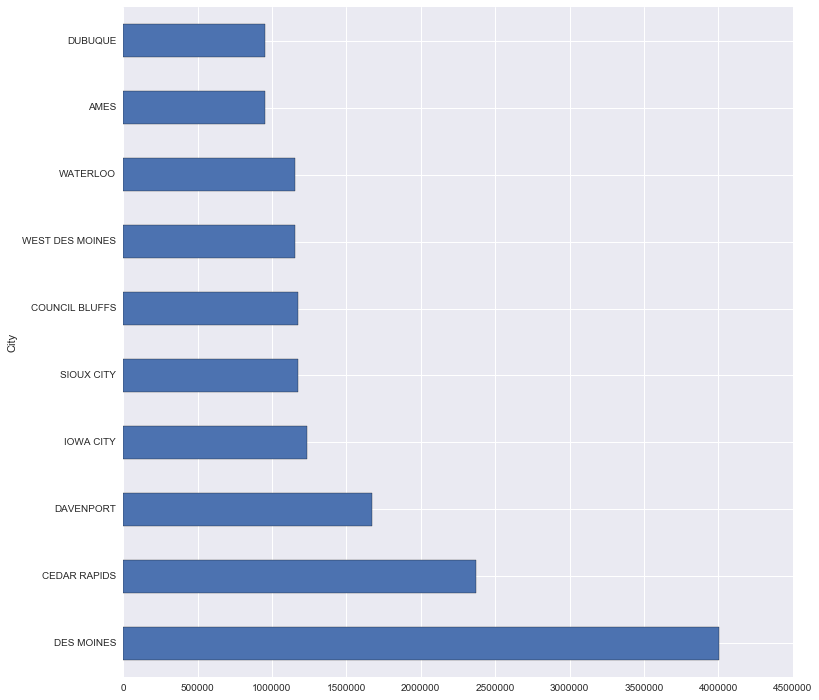

In [24]:
#sales for top 10 cities

import seaborn as sns
sns.set(rc={"figure.figsize": (12, 12)})

sales_agg.groupby(['City'])['Sale (Dollars)'].sum().sort_values(ascending = False)[0:10].plot(kind='barh')

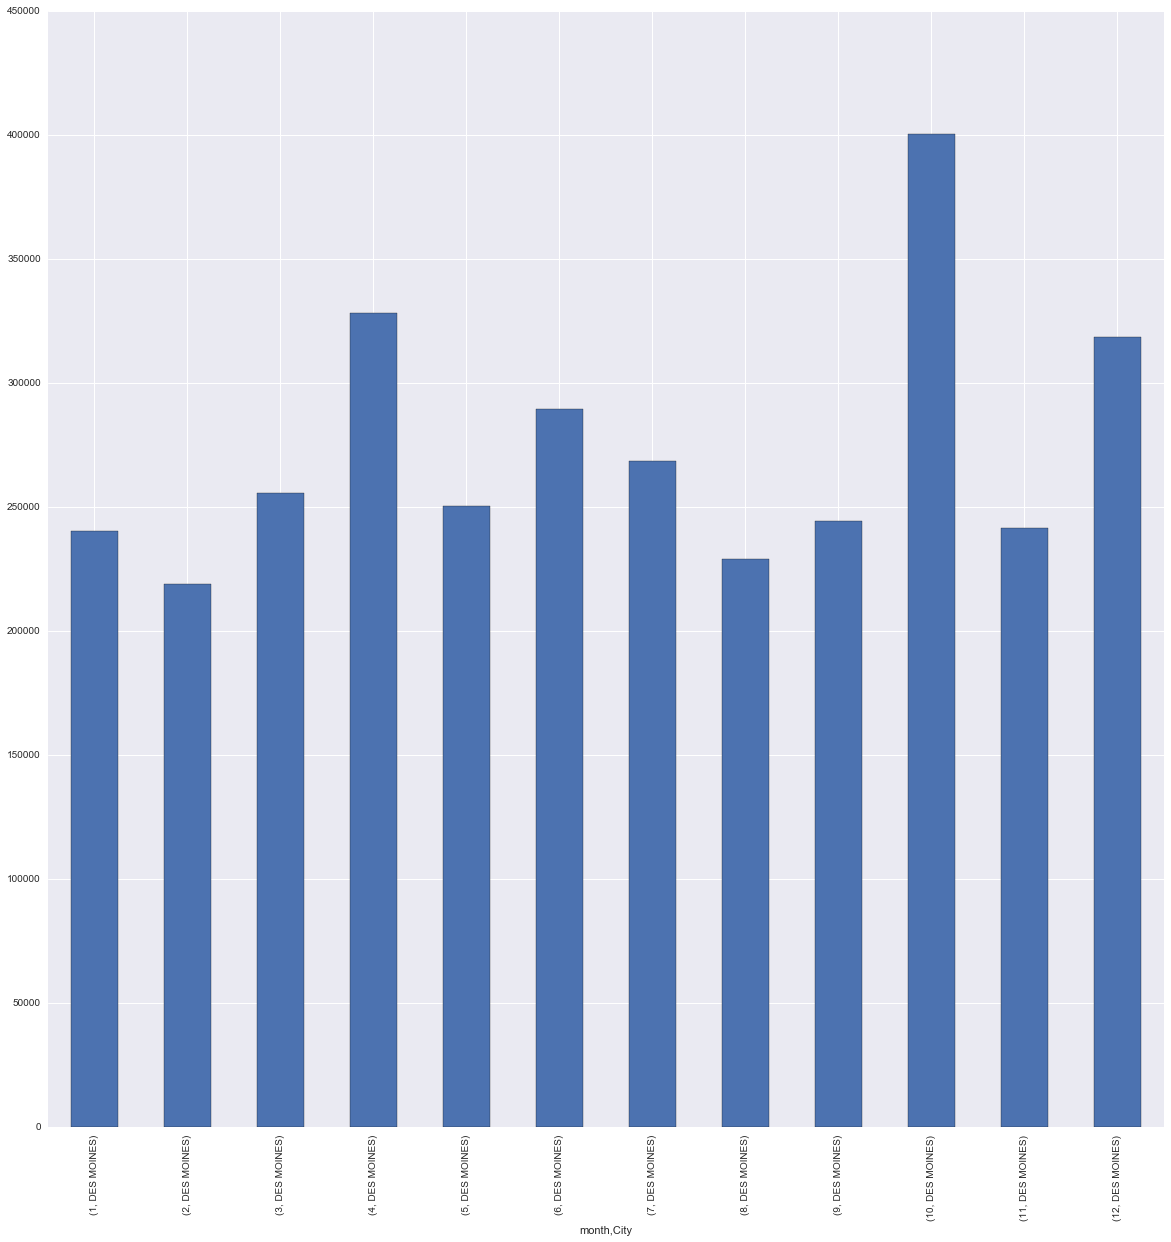

In [76]:
#sales by month 2015 desmoines

sns.set(rc={"figure.figsize": (20, 20)})




stores_2015_desmoines = sales_agg[sales_agg.Date.dt.year == 2015]
#print stores_2015.columns


desmoines = stores_2015_desmoines[stores_2015_desmoines['City'] == 'DES MOINES']
desmoines.groupby(['month','City'])['Sale (Dollars)'].sum().plot.bar()



In [ ]:
sales_agg.groupby('month')['Sale (Dollars)'].plot(kind = 'barh')

month
1     Axes(0.125,0.125;0.775x0.775)
2     Axes(0.125,0.125;0.775x0.775)
3     Axes(0.125,0.125;0.775x0.775)
4     Axes(0.125,0.125;0.775x0.775)
5     Axes(0.125,0.125;0.775x0.775)
6     Axes(0.125,0.125;0.775x0.775)
7     Axes(0.125,0.125;0.775x0.775)
8     Axes(0.125,0.125;0.775x0.775)
9     Axes(0.125,0.125;0.775x0.775)
10    Axes(0.125,0.125;0.775x0.775)
11    Axes(0.125,0.125;0.775x0.775)
12    Axes(0.125,0.125;0.775x0.775)
Name: Sale (Dollars), dtype: object

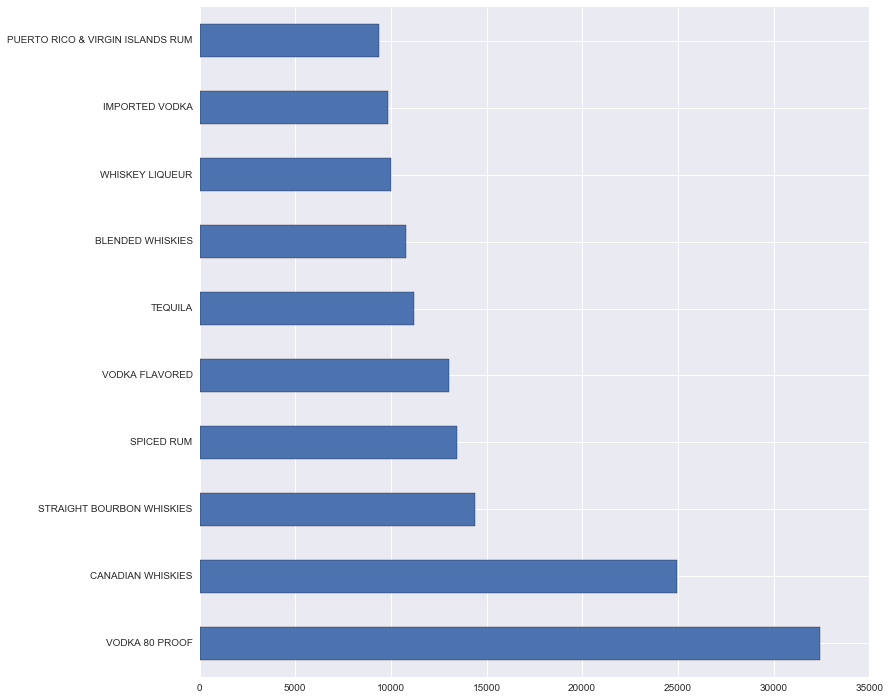

In [30]:
sales_agg['Category Name'].value_counts()[0:10].plot(kind='barh')

Proceed with any calculations that you need for your models, such as grouping
sales by zip code, most common vendor number per store, etc. Once you have finished adding columns, be sure to save the dataframe.

In [21]:
# Sales 2015  Q1
import numpy as np

mask_q1_2015 = (sales_agg['Date'] >= '2015-1-1') & (sales_agg['Date'] < '2015-4-1')   #create mask for q1
group_q1_2015 = sales_agg[mask_q1_2015].groupby('Store Number')
sales_q1_2015 = pd.DataFrame(group_q1_2015['Sale (Dollars)'].sum())    #group by and sum per store

sales_q1_2015.reset_index(inplace=True)
sales_q1_2015 = sales_q1_2015.rename(columns = {'Sale (Dollars)':'2015_q1_sales'})

sales_q1_2015.shape





(1046, 2)

In [22]:

mask_q1_2016 = (sales_agg['Date'] > '2015-12-31') & (sales_agg['Date'] < '2016-4-1')

group_q1_2016 = sales_agg[mask_q1_2016].groupby('Store Number')
sales_q1_2016 = pd.DataFrame(group_q1_2016['Sale (Dollars)'].sum())
print sales_q1_2016.shape

sales_q1_2016.reset_index(inplace=True)
sales_q1_2016 = sales_q1_2016.rename(columns = {'Sale (Dollars)':'2016_q1_sales'})



sales_q1_2016.shape

(1035, 1)


(1035, 2)

In [23]:
total_sales = sales_q1_2015
total_sales.sort_values('Store Number')
total_sales['2016_q1_sales'] = sales_q1_2016['2016_q1_sales']

In [24]:

total_sales['margin_average'] = sales_agg.groupby('Store Number').mean().Margin.values
total_sales.head(1)
total_sales['profit_total'] = sales_agg.groupby('Store Number').sum().Profit.values
total_sales['bottles_total'] = sales_agg.groupby('Store Number').sum()['Bottles Sold'].values
total_sales['volume_sold_gallons'] = sales_agg.groupby('Store Number').sum()['Volume Sold (Gallons)'].values
total_sales['county'] = sales_agg.groupby('Store Number').max()['County'].values

In [25]:
total_sales['weighted_margin'] = total_sales['profit_total']/total_sales['bottles_total']
total_sales.head()

,Store Number,2015_q1_sales,2016_q1_sales,margin_average,profit_total,bottles_total,volume_sold_gallons,county,weighted_margin
0,2106,39287.29,30478.75,5.167822,58916.88,12573,3127.28,Black Hawk,4.685984
1,2113,2833.25,2065.90,5.429565,3802.53,830,221.03,Webster,4.581361
2,2130,24272.57,27856.11,5.008799,46517.61,9144,2228.81,Black Hawk,5.087228
3,2152,2003.46,904.66,4.302484,2891.61,670,190.39,Cerro Gordo,4.315836
4,2178,5856.41,5588.50,4.825627,10034.46,2408,644.09,Allamakee,4.167135


In [69]:
total_sales.corr()

,Store Number,2015_q1_sales,2016_q1_sales,margin_average,profit_total,bottles_total,volume_sold_gallons,weighted_margin,q1_pct_change,2015_q1_sales_bottlenorm,2016_q1_sales_bottlenorm,sales_change_growth,ratio
Store Number,1.000000,-0.350198,-0.350978,-0.326101,-0.364892,-0.380989,-0.398850,-0.378709,0.008875,-0.203543,-0.014383,0.032910,0.032910
2015_q1_sales,-0.350198,1.000000,0.226781,0.296521,0.982379,0.969634,0.974229,0.272990,-0.044021,0.217831,-0.055241,-0.045741,-0.045741
2016_q1_sales,-0.350978,0.226781,1.000000,0.108024,0.224638,0.235770,0.240271,0.126237,0.544821,0.030573,0.590078,0.004091,0.004091
margin_average,-0.326101,0.296521,0.108024,1.000000,0.304742,0.246298,0.296374,0.858690,-0.042079,0.485161,-0.012335,0.049363,0.049363
profit_total,-0.364892,0.982379,0.224638,0.304742,1.000000,0.987633,0.993049,0.283911,-0.041187,0.134754,-0.054774,-0.013256,-0.013256
bottles_total,-0.380989,0.969634,0.235770,0.246298,0.987633,1.000000,0.985105,0.202037,-0.046387,0.087165,-0.063915,-0.017212,-0.017212
volume_sold_gallons,-0.398850,0.974229,0.240271,0.296374,0.993049,0.985105,1.000000,0.288689,-0.043712,0.134929,-0.057651,-0.014686,-0.014686
weighted_margin,-0.378709,0.272990,0.126237,0.858690,0.283911,0.202037,0.288689,1.000000,-0.026535,0.571909,0.010990,0.064255,0.064255
q1_pct_change,0.008875,-0.044021,0.544821,-0.042079,-0.041187,-0.046387,-0.043712,-0.026535,1.000000,-0.105602,0.977104,0.065317,0.065317
2015_q1_sales_bottlenorm,-0.203543,0.217831,0.030573,0.485161,0.134754,0.087165,0.134929,0.571909,-0.105602,1.000000,-0.047746,-0.205062,-0.205062


In [26]:
total_sales = total_sales.dropna() # drop any Na values from the stores that closed

In [27]:
total_sales.corr()

,Store Number,2015_q1_sales,2016_q1_sales,margin_average,profit_total,bottles_total,volume_sold_gallons,weighted_margin
Store Number,1.000000,-0.350198,-0.350978,-0.326101,-0.364892,-0.380989,-0.398850,-0.378709
2015_q1_sales,-0.350198,1.000000,0.226781,0.296521,0.982379,0.969634,0.974229,0.272990
2016_q1_sales,-0.350978,0.226781,1.000000,0.108024,0.224638,0.235770,0.240271,0.126237
margin_average,-0.326101,0.296521,0.108024,1.000000,0.304742,0.246298,0.296374,0.858690
profit_total,-0.364892,0.982379,0.224638,0.304742,1.000000,0.987633,0.993049,0.283911
bottles_total,-0.380989,0.969634,0.235770,0.246298,0.987633,1.000000,0.985105,0.202037
volume_sold_gallons,-0.398850,0.974229,0.240271,0.296374,0.993049,0.985105,1.000000,0.288689
weighted_margin,-0.378709,0.272990,0.126237,0.858690,0.283911,0.202037,0.288689,1.000000


In [28]:
total_sales.head()

,Store Number,2015_q1_sales,2016_q1_sales,margin_average,profit_total,bottles_total,volume_sold_gallons,county,weighted_margin
0,2106,39287.29,30478.75,5.167822,58916.88,12573,3127.28,Black Hawk,4.685984
1,2113,2833.25,2065.90,5.429565,3802.53,830,221.03,Webster,4.581361
2,2130,24272.57,27856.11,5.008799,46517.61,9144,2228.81,Black Hawk,5.087228
3,2152,2003.46,904.66,4.302484,2891.61,670,190.39,Cerro Gordo,4.315836
4,2178,5856.41,5588.50,4.825627,10034.46,2408,644.09,Allamakee,4.167135


In [29]:
from sklearn import cross_validation
from sklearn import linear_model

In [30]:
total_sales['q1_pct_change'] = total_sales['2016_q1_sales']/total_sales['2015_q1_sales']

/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [31]:
total_sales['2015_q1_sales_bottlenorm'] = total_sales["2015_q1_sales"].values/total_sales.bottles_total.values
total_sales['2016_q1_sales_bottlenorm'] = total_sales['2016_q1_sales'].values/total_sales.bottles_total.values

/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [32]:
total_sales.head()

,Store Number,2015_q1_sales,2016_q1_sales,margin_average,profit_total,bottles_total,volume_sold_gallons,county,weighted_margin,q1_pct_change,2015_q1_sales_bottlenorm,2016_q1_sales_bottlenorm
0,2106,39287.29,30478.75,5.167822,58916.88,12573,3127.28,Black Hawk,4.685984,0.775792,3.124735,2.424143
1,2113,2833.25,2065.90,5.429565,3802.53,830,221.03,Webster,4.581361,0.729163,3.413554,2.489036
2,2130,24272.57,27856.11,5.008799,46517.61,9144,2228.81,Black Hawk,5.087228,1.147637,2.654481,3.046381
3,2152,2003.46,904.66,4.302484,2891.61,670,190.39,Cerro Gordo,4.315836,0.451549,2.990239,1.350239
4,2178,5856.41,5588.50,4.825627,10034.46,2408,644.09,Allamakee,4.167135,0.954254,2.432064,2.320806


In [33]:
total_sales[['2015_q1_sales', '2016_q1_sales', 'bottles_total', '2015_q1_sales_bottlenorm']].corr()

,2015_q1_sales,2016_q1_sales,bottles_total,2015_q1_sales_bottlenorm
2015_q1_sales,1.000000,0.226781,0.969634,0.217831
2016_q1_sales,0.226781,1.000000,0.235770,0.030573
bottles_total,0.969634,0.235770,1.000000,0.087165
2015_q1_sales_bottlenorm,0.217831,0.030573,0.087165,1.000000


In [34]:
print total_sales.q1_pct_change.describe()
print np.sum(total_sales.q1_pct_change > 3)

count    1035.000000
mean        3.008614
std        20.454585
min         0.004905
25%         0.482106
50%         0.976206
75%         2.102471
max       614.702550
Name: q1_pct_change, dtype: float64
171


In [ ]:
group_time = sales_agg[['Store Number','month','Sale (Dollars)','Date']]
group_time_2015 = group_time[group_time['Date'].dt.year == 2015]
over_time_2015 = group_time_2015.groupby(['Store Number','month']).sum()
over_time_2015.head(1)

In [36]:
print 6000/5000.

1.2


In [37]:
sales_change = pd.DataFrame(over_time_2015['Sale (Dollars)']).reset_index()

sales_change1 = sales_change[sales_change['month'] == 1]
sales_change2 = sales_change[sales_change['month']==12]
    

In [38]:
sales_change2.head()

,Store Number,month,Sale (Dollars)
11,2106,12,9665.47
23,2113,12,1109.77
35,2130,12,11425.14
47,2152,12,629.49
59,2178,12,2705.04


In [39]:
sales_diff = sales_change1.merge(sales_change2, on = 'Store Number')
sales_diff.head()
sales_diff['2016_sales'] = total_sales['2016_q1_sales']
sales_diff.dropna(inplace = True)
sales_diff.tail()

,Store Number,month_x,Sale (Dollars)_x,month_y,Sale (Dollars)_y,2016_sales
1030,5070,1,326.84,12,369.07,978.38
1031,5071,1,489.85,12,506.22,833.09
1032,5072,1,60.72,12,135.18,988.56
1033,5073,1,361.68,12,1095.66,708.24
1034,5076,1,851.06,12,64.21,1382.64


In [40]:
sales_change_growth = (sales_diff['Sale (Dollars)_y'].values - sales_diff['Sale (Dollars)_x'].values)/(sales_diff['Sale (Dollars)_x'].values)

len(sales_change_growth)

total_sales['sales_change_growth'] = sales_change_growth


/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [41]:
total_sales['ratio'] = (sales_diff['Sale (Dollars)_y'].values / sales_diff['Sale (Dollars)_x'].values)

/Users/Stav/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [42]:
total_sales = total_sales.dropna()
total_sales.head()

,Store Number,2015_q1_sales,2016_q1_sales,margin_average,profit_total,bottles_total,volume_sold_gallons,county,weighted_margin,q1_pct_change,2015_q1_sales_bottlenorm,2016_q1_sales_bottlenorm,sales_change_growth,ratio
0,2106,39287.29,30478.75,5.167822,58916.88,12573,3127.28,Black Hawk,4.685984,0.775792,3.124735,2.424143,-0.287617,0.712383
1,2113,2833.25,2065.90,5.429565,3802.53,830,221.03,Webster,4.581361,0.729163,3.413554,2.489036,0.363890,1.363890
2,2130,24272.57,27856.11,5.008799,46517.61,9144,2228.81,Black Hawk,5.087228,1.147637,2.654481,3.046381,0.478856,1.478856
3,2152,2003.46,904.66,4.302484,2891.61,670,190.39,Cerro Gordo,4.315836,0.451549,2.990239,1.350239,-0.426025,0.573975
4,2178,5856.41,5588.50,4.825627,10034.46,2408,644.09,Allamakee,4.167135,0.954254,2.432064,2.320806,0.201428,1.201428


In [43]:
total_sales.ratio.max()

34.443122742091809

In [44]:
np.corrcoef(total_sales.ratio.values, total_sales.sales_change_growth.values)

array([[ 1.,  1.],
       [ 1.,  1.]])

In [51]:
total_sales = total_sales.dropna()

In [101]:
import sklearn
from sklearn.cross_validation import KFold

#'2015_q1_sales_bottlenorm','sales_change_growth','q1_pct_change'
    
#X = total_sales.ix[total_sales.q1_pct_change < 4., ["2015_q1_sales"]]
#y = total_sales.ix[total_sales.q1_pct_change < 4., '2016_q1_sales']

X = total_sales[['profit_total']]
y = total_sales['2016_q1_sales']

#kfolds = KFold(X.shape[0], n_folds=2)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.33)

lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)

print model.score(X_test, y_test)


stop

#bottle norm: sales adjusting for the size of the store

for traini, testi in kfolds:
    
    print len(traini)
    print(len(testi))
    print X.shape

    lm = linear_model.LinearRegression()

    model = lm.fit(X.iloc[traini], y.iloc[traini])

    print model.score(X.iloc[testi], y.iloc[testi])

    #print model.predict(X.iloc[testi])

-0.127861281359


NameError: name 'stop' is not defined

In [67]:
np.corrcoef(total_sales['2015_q1_sales'], total_sales['2016_q1_sales'])

array([[ 1.        ,  0.22678073],
       [ 0.22678073,  1.        ]])

# Summary

Created different features to find correlated variables with q1 Sales such as Margin, Profit, Bottle Norm denoting the sales relative to the size of the store, along wtih growth and percent change by using the 1st and 12th month of 2015. Overall I was not able to find any strongly correlated variables that weren't directly coming from a variable itself. The model I made in the end was trying to predict 2016_q1_sales and it was very inconsistent. My oppinion is that this dataset was very finnicky and hard to work wtih, and some further analysis would need to be performed with more sophisticated techniques. My conclusion is that I was not able to predict 2016_q1_sales from any of the variables provided or ones that I waas produced.

In [ ]:
%%bash 
pwd

In [ ]:
pwd